# Exploración y Recolección de Datos con Joins en Fórmula 1

Este notebook está diseñado para una clase práctica en la que se exploran y recolectan datos mediante la unión (_joins_) de múltiples datasets de Fórmula 1. El objetivo es analizar conjuntamente información procedente de diferentes orígenes para responder preguntas de negocio y obtener insights sobre la historia de la F1.

## Objetivos de la Clase

1. Comprender el uso de joins para combinar tablas utilizando claves comunes (por ejemplo, `raceId` y `driverId`).
2. Explorar la integración de datos provenientes de archivos distintos y su impacto en la información resultante.
3. Responder a preguntas de negocio como:
   - ¿Cuántos pilotos han participado en la F1?
   - ¿Cuál es el circuito que ha sido más utilizado?
   - ¿Qué piloto ha ganado más carreras?
   - ¿Qué piloto ha acumulado más puntos durante su carrera?
4. Interpretar gráficamente resultados y tendencias a lo largo del tiempo.

La idea es que, mediante el uso de operaciones join, los estudiantes unan y analicen datos de varias fuentes (por ejemplo, `races.csv`, `results.csv` y `drivers.csv`) para elaborar un análisis exploratorio completo.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
!unzip f1stasts_1.zip

--2025-04-23 22:04:04--  https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip [following]
--2025-04-23 22:04:05--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6183969 (5.9M) [application/zip]
Saving to: ‘f1stasts_1.zip’

f1stasts_1.zip      100%[===================>]   5.90M  17.8MB/s    in 0.3s    

2025-04-23 22:04:07 (17.8 MB/s) - ‘f1stasts_1.zip’ saved [6183969/6183969]

## 1. Carga y Exploración de los Datos

En esta sección se cargan y revisan brevemente los datasets principales:

- **races.csv:** Contiene detalles de cada carrera (año, circuito, fecha, etc.).
- **results.csv:** Registra los resultados de cada carrera (posición, puntos, vueltas, etc.).
- **drivers.csv:** Información sobre cada piloto (nombre, nacionalidad, fecha de nacimiento, etc.).

Asegúrate de tener estos archivos en tu entorno de trabajo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## 2. Análisis Preliminar y Preparación de los Datos

Antes de realizar las uniones, es importante revisar las columnas clave de cada DataFrame:

- En **races_df** utilizaremos `raceId` para identificar la carrera.
- En **results_df** también se emplea `raceId` y `driverId` para enlazar resultados y pilotos.
- En **drivers_df** `driverId` es la clave para identificar a cada piloto.

Realiza un análisis exploratorio básico (conteos, tipos de dato, detección de nulos) para asegurarte de la calidad de la información.

In [52]:
race_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')
constructors_df = pd.read_csv('constructors.csv')


In [53]:
constructors_df

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [4]:
race_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [5]:
for col in race_df.columns:
  race_df.loc[race_df[col]=='\\N',col]= np.nan


In [6]:
race_df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/di

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1.0,2009.0,1.0,1.0,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2009.0,2.0,2.0,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2009.0,3.0,17.0,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2009.0,4.0,3.0,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2009.0,5.0,4.0,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116.0,2023.0,18.0,69.0,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,NaN,NaN,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117.0,2023.0,19.0,32.0,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,NaN,NaN
1098,1118.0,2023.0,20.0,18.0,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,NaN,NaN,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119.0,2023.0,21.0,80.0,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,NaN,NaN


In [7]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raceId       1101 non-null   float64
 1   year         1101 non-null   float64
 2   round        1101 non-null   float64
 3   circuitId    1101 non-null   float64
 4   name         1101 non-null   object 
 5   date         1101 non-null   object 
 6   time         370 non-null    object 
 7   url          1101 non-null   object 
 8   fp1_date     66 non-null     object 
 9   fp1_time     44 non-null     object 
 10  fp2_date     66 non-null     object 
 11  fp2_time     44 non-null     object 
 12  fp3_date     54 non-null     object 
 13  fp3_time     35 non-null     object 
 14  quali_date   66 non-null     object 
 15  quali_time   44 non-null     object 
 16  sprint_date  12 non-null     object 
 17  sprint_time  9 non-null      object 
dtypes: float64(4), object(14)
memory usage: 155.0+ K

In [8]:
race_df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/di

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1.0,2009.0,1.0,1.0,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2009.0,2.0,2.0,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2009.0,3.0,17.0,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2009.0,4.0,3.0,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2009.0,5.0,4.0,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
race_df.isnull().sum()

,0
raceId,0
year,0
round,0
circuitId,0
name,0
date,0
time,731
url,0
fp1_date,1035
fp1_time,1057


In [10]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [11]:
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [12]:
results_df.isnull().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number,0
grid,0
position,0
positionText,0
positionOrder,0
points,0


In [13]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [14]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [15]:
drivers_df.isnull().sum()

,0
driverId,0
driverRef,0
number,0
code,0
forename,0
surname,0
dob,0
nationality,0
url,0


## 3. Integración de Datos mediante Joins

El objetivo es unir la información de las distintas tablas para poder responder a preguntas de negocio. En este ejercicio central, se utilizarán joins para obtener insights combinando datos de carreras, resultados y pilotos.

### 3.1 Unir `results_df` y `drivers_df`

Para analizar la participación y resultados de cada piloto, realizamos un merge entre `results_df` y `drivers_df` utilizando la clave `driverId`.

**Pregunta clave:** ¿Cuántos pilotos distintos han participado en la F1?

Utiliza el DataFrame resultante para explorar esta pregunta.

In [16]:
df_resultados = pd.merge(results_df, drivers_df, on='driverId', how='inner')
df_resultados

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,216.719,1,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,215.464,1,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,227.169,1,ricciardo,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,228.213,1,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,229.415,1,hulkenberg,27,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,222.864,130,sainz,55,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.


In [27]:
num_pilotos = df_resultados['driverId'].nunique()
print(f"Número de pilotos distintos que han participado en la F1: {num_pilotos}")

Número de pilotos distintos que han participado en la F1: 857


### 3.2. Unir `df_resultados` con `races_df`

Ahora, para relacionar los resultados con cada carrera, se efectúa la unión entre el DataFrame obtenido (`df_resultados`) y `races_df` a través de la clave `raceId`.

**Pregunta clave:** ¿Qué información adicional sobre cada carrera (fecha, circuito, etc.) se puede incorporar para enriquecer el análisis?

Explora y analiza cómo afecta esta integración en el conjunto de datos final.

In [28]:
df_tablacompleta = pd.merge(df_resultados, race_df, on='raceId', how='inner')
df_tablacompleta

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,18,2,2,3,5,2,2,2,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,18,3,3,7,7,3,3,3,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,18,4,4,5,11,4,4,4,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18,5,1,23,3,5,5,5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00


In [19]:
df_tablacompleta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number_x         26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time_x           26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

## 4. Análisis Conjunto y Ejercicios Interactivos

Con el DataFrame combinado (`df_completo`) podremos responder a varias preguntas de negocio y realizar análisis conjuntos. A continuación se proponen algunos ejercicios:

### Ejercicio 1: Identificar el Circuito Más Utilizado

Utiliza `races_df` y la información del DataFrame combinado para determinar cuál es el circuito (identificado con `circuitId` o el nombre del circuito, si se encuentra) que ha sido sede de la mayor cantidad de carreras.

**Sugerencia:** Usa la función `value_counts()` y discute el resultado con los estudiantes.

In [29]:
circuit_counts = df_tablacompleta['name'].value_counts()
circuit_counts

,count
name,
British Grand Prix,1853
Italian Grand Prix,1824
Monaco Grand Prix,1644
German Grand Prix,1599
Belgian Grand Prix,1577
French Grand Prix,1484
Canadian Grand Prix,1271
Spanish Grand Prix,1256
Brazilian Grand Prix,1163


### Ejercicio 2: Piloto con Más Victorias

Filtra el DataFrame combinado para quedarte con aquellos registros donde la posición final (`position`) sea 1, lo que indica una victoria. Luego, agrupa por piloto para determinar quién ha ganado más carreras.

**Pregunta para los estudiantes:** _¿Qué piloto se destaca por su número de victorias y cómo se relaciona este dato con otros indicadores de rendimiento?_

In [31]:
# Filtrar victorias (posición 1)
numvictorias_df = df_tablacompleta[df_tablacompleta['position'] == '1']
numvictorias_df

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,23,19,8,6,1,2,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,45,20,13,6,2,2,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,67,21,8,6,1,1,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,89,22,13,6,2,1,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25980,25986,1106,830,9,1,1,1,1,1,25.0,...,2023-06-16,17:30:00,2023-06-16,21:00:00,2023-06-17,16:30:00,2023-06-17,20:00:00,NaN,NaN
26000,26006,1107,830,9,1,1,1,1,1,26.0,...,2023-06-30,11:30:00,2023-07-01,10:30:00,NaN,NaN,2023-06-30,15:00:00,2023-07-01,14:30:00
26020,26026,1108,830,9,1,1,1,1,1,26.0,...,2023-07-07,11:30:00,2023-07-07,15:00:00,2023-07-08,10:30:00,2023-07-08,14:00:00,NaN,NaN
26040,26046,1109,830,9,1,2,1,1,1,26.0,...,2023-07-21,11:30:00,2023-07-21,15:00:00,2023-07-22,10:30:00,2023-07-22,14:00:00,NaN,NaN


In [32]:
pilotos_ganadores = numvictorias_df.groupby('driverRef')['position'].count().sort_values(ascending=False)
pilotos_ganadores

,position
driverRef,
hamilton,103
michael_schumacher,91
vettel,53
prost,51
max_verstappen,45
...,...
sweikert,1
taruffi,1
trulli,1


### Ejercicio 3: Piloto con Más Puntos

Agrupa el DataFrame combinado para sumar el total de puntos (`points`) obtenidos por cada piloto a lo largo de su carrera.

**Pregunta para los estudiantes:** _¿Existe correlación entre el número de victorias y la suma total de puntos? ¿Qué puede influir en esta relación?_

In [33]:
puntos_conductor = df_tablacompleta.groupby('driverRef')['points'].sum().sort_values(ascending=False)
puntos_conductor

,points
driverRef,
hamilton,4540.5
vettel,3098.0
max_verstappen,2275.5
alonso,2203.0
raikkonen,1873.0
...,...
hesnault,0.0
heyer,0.0
hirt,0.0


### Ejercicio 4: Distribución de Nacionalidades de los Pilotos

Analiza la columna `nationality` presente en `drivers_df` para determinar qué nacionalidades están mejor representadas en la F1. Realiza un gráfico de pastel para visualizar la distribución de pilotos por país.

**Debate:** ¿Qué factores históricos o deportivos crees que puedan explicar esta distribución?

In [34]:
distribucion_nacionalidad=df_tablacompleta['nationality'].value_counts()
distribucion_nacionalidad

,count
nationality,
British,4454
Italian,3418
French,3028
German,2396
Brazilian,1953
American,1291
Finnish,1159
Spanish,846
Australian,835


Text(0.5, 1.0, 'Distribution of F1 Drivers by Nationality')

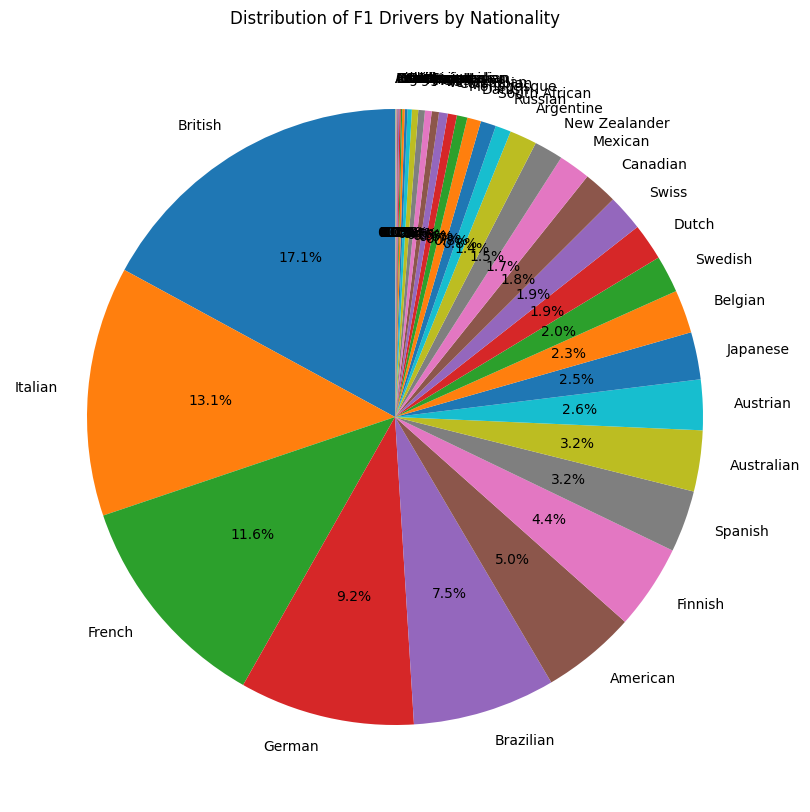

In [35]:
plt.figure(figsize=(10, 10))
plt.pie(distribucion_nacionalidad.values, labels=distribucion_nacionalidad.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of F1 Drivers by Nationality')

In [36]:
top_9 = distribucion_nacionalidad[:9]
other_count = distribucion_nacionalidad[9:].sum()
pie_data = pd.concat([top_9, pd.Series([other_count], index=['Others'])])
pie_data

,0
British,4454
Italian,3418
French,3028
German,2396
Brazilian,1953
American,1291
Finnish,1159
Spanish,846
Australian,835
Others,6700


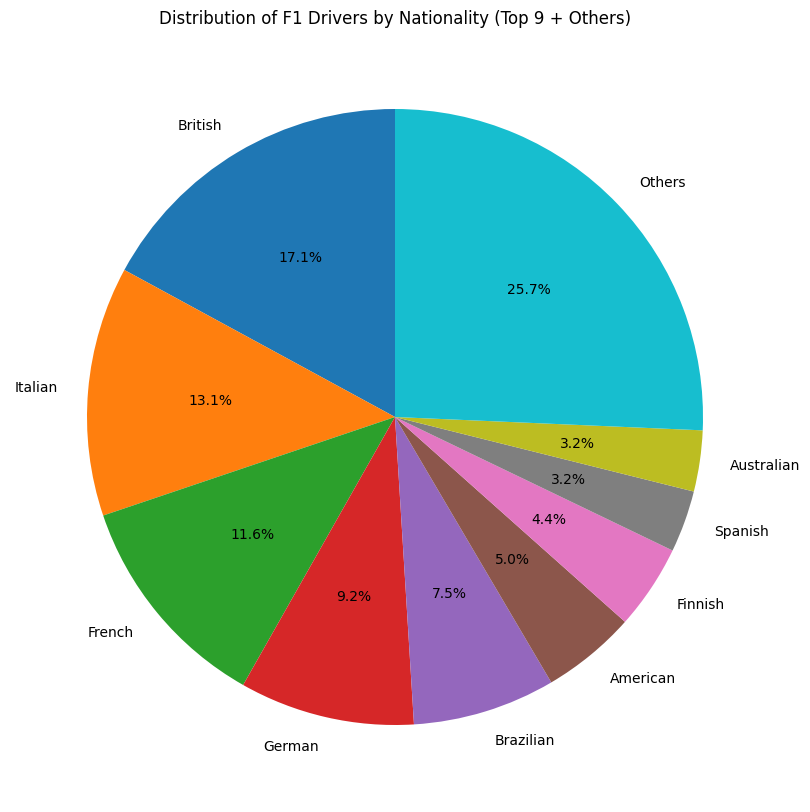

In [37]:
plt.figure(figsize=(10, 10))
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of F1 Drivers by Nationality (Top 9 + Others)')
plt.show()

### Ejercicio 5: Evolución del Número de Carreras por Año

Genera un gráfico de barras que muestre cómo ha evolucionado el número de carreras a lo largo de los años, utilizando la información de `races_df`.

**Pregunta para los estudiantes:** _¿Qué eventos o cambios en la industria (por ejemplo, crisis, cambios en el reglamento) podrían explicar las variaciones observadas a lo largo de la historia?_

Este ejercicio ayudará a vincular el análisis de datos con contextos históricos y comerciales.

In [38]:
carreras_ano = df_tablacompleta.groupby('year')['raceId'].count()
carreras_ano

,raceId
year,
1950.0,160
1951.0,179
1952.0,215
1953.0,246
1954.0,230
...,...
2019.0,420
2020.0,340
2021.0,440


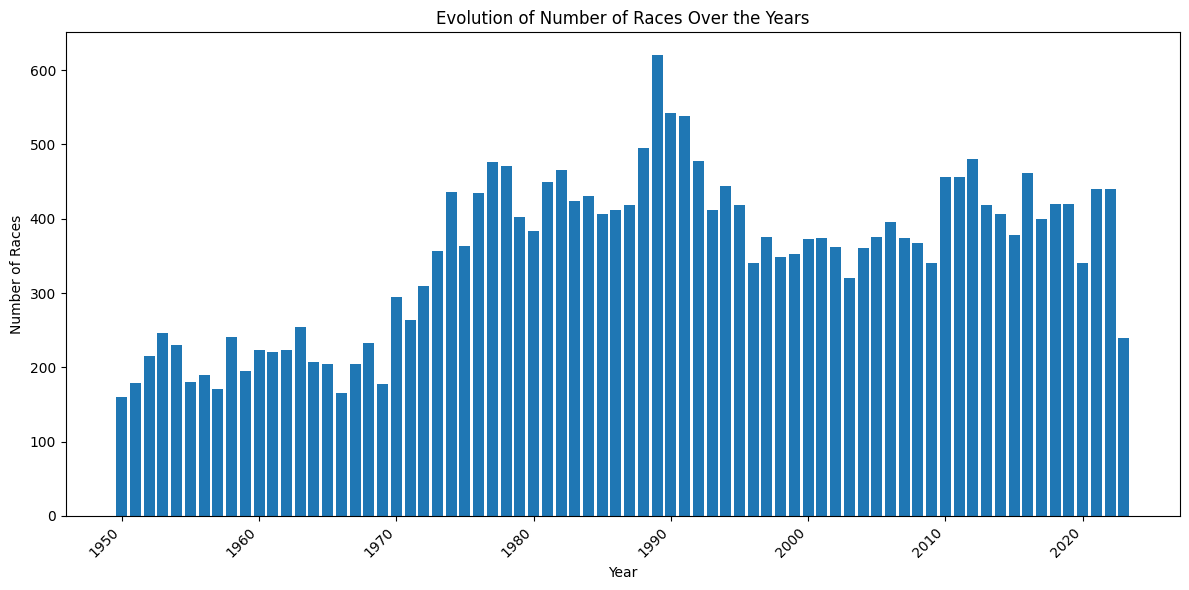

In [39]:
plt.figure(figsize=(12, 6))
plt.bar(carreras_ano.index, carreras_ano.values)
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.title("Evolution of Number of Races Over the Years")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
puntos_equipo_ano = df_tablacompleta.groupby(['year', 'constructorId'])['points'].mean().reset_index()
puntos_equipo_ano

,year,constructorId,points
0,1950.0,6,1.400000
1,1950.0,51,4.045455
2,1950.0,87,0.000000
3,1950.0,105,0.314286
4,1950.0,107,0.000000
...,...,...,...
1096,2023.0,117,7.625000
1097,2023.0,131,9.833333
1098,2023.0,210,0.333333
1099,2023.0,213,0.125000


In [44]:
ultimas_temporadas = puntos_equipo_ano[puntos_equipo_ano['year'] >= puntos_equipo_ano['year'].max() - 4]
ultimas_temporadas

,year,constructorId,points
1051,2019.0,1,3.452381
1052,2019.0,3,0.023810
1053,2019.0,4,2.166667
1054,2019.0,5,2.023810
1055,2019.0,6,12.000000
1056,2019.0,9,9.928571
1057,2019.0,51,1.357143
1058,2019.0,131,17.595238
1059,2019.0,210,0.666667
1060,2019.0,211,1.738095


In [57]:
df_tablacompleta2 = pd.merge(df_tablacompleta, constructors_df, on='constructorId', how='inner')
df_tablacompleta2

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorRef,name_y,nationality_y,url
0,1,18,1,1,22,1,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,18,2,2,3,5,2,2,2,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,18,3,3,7,7,3,3,3,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,18,4,4,5,11,4,4,4,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,18,5,1,23,3,5,5,5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari


In [59]:
df_tablacompleta = pd.merge(df_tablacompleta, constructors_df[['constructorId', 'constructorRef']], on='constructorId', how='left')

In [60]:
puntos_equipo_año = df_tablacompleta.groupby(['year', 'constructorRef'])['points'].mean().reset_index()
puntos_equipo_año

,year,constructorRef,points
0,1950.0,adams,0.000000
1,1950.0,alfa,4.045455
2,1950.0,alta,0.000000
3,1950.0,cooper,0.000000
4,1950.0,deidt,3.333333
...,...,...,...
1096,2023.0,haas,0.333333
1097,2023.0,mclaren,3.875000
1098,2023.0,mercedes,9.833333
1099,2023.0,red_bull,19.416667


In [61]:
ultimas_temporadas = puntos_equipo_año[puntos_equipo_año['year'] >= puntos_equipo_año['year'].max() - 4]
ultimas_temporadas

,year,constructorRef,points
1051,2019.0,alfa,1.357143
1052,2019.0,ferrari,12.000000
1053,2019.0,haas,0.666667
1054,2019.0,mclaren,3.452381
1055,2019.0,mercedes,17.595238
1056,2019.0,racing_point,1.738095
1057,2019.0,red_bull,9.928571
1058,2019.0,renault,2.166667
1059,2019.0,toro_rosso,2.023810
1060,2019.0,williams,0.023810


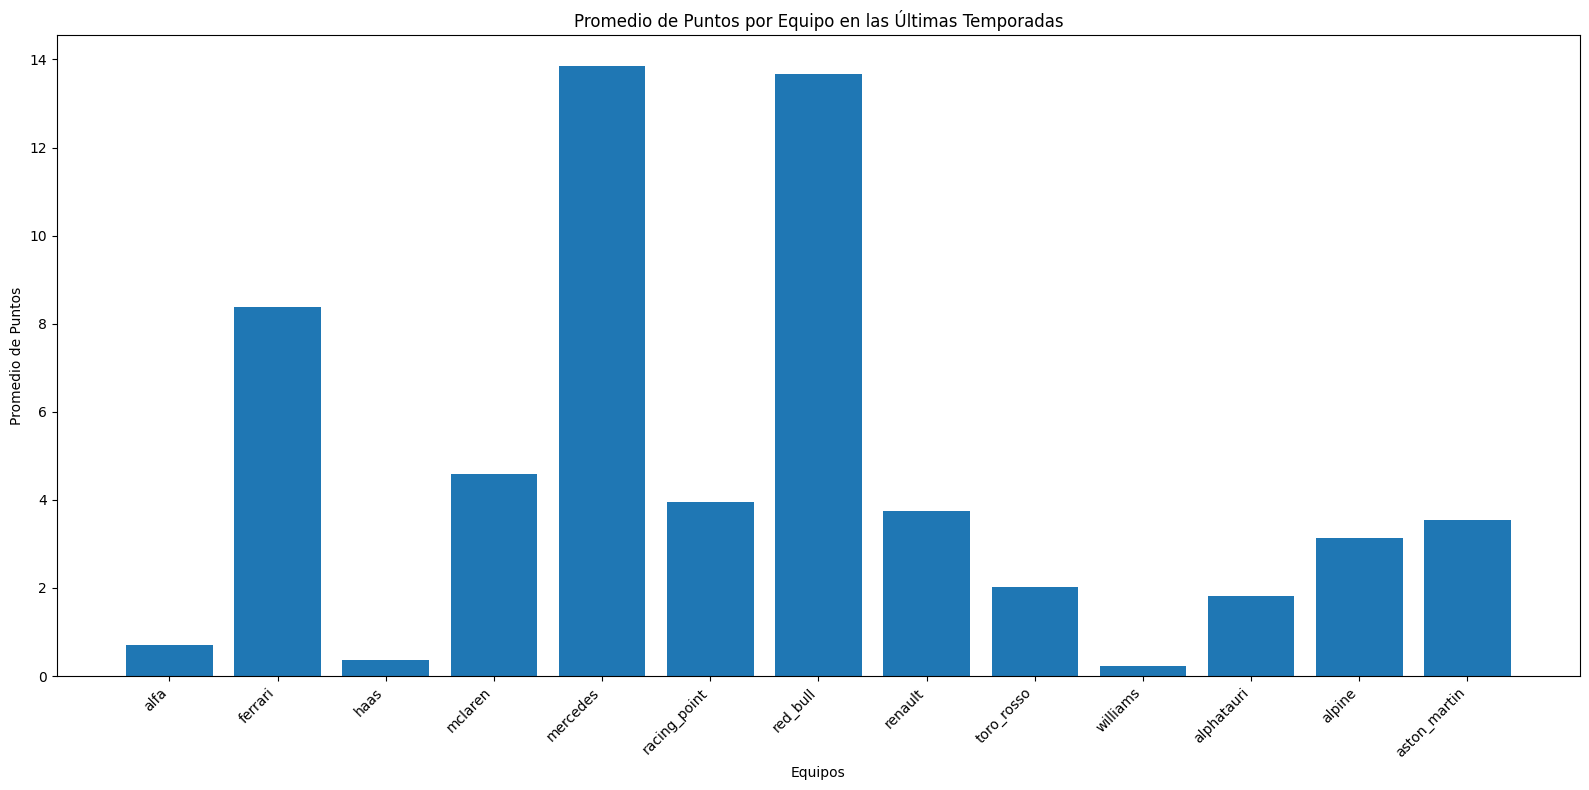

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar el tamaño de la figura
plt.figure(figsize=(16, 8))

# Obtener los nombres de los equipos y los promedios de puntos
equipos = ultimas_temporadas['constructorRef'].unique()
promedios_puntos = []
for equipo in equipos:
    promedio = ultimas_temporadas[ultimas_temporadas['constructorRef'] == equipo]['points'].mean()
    promedios_puntos.append(promedio)

# Crear la gráfica de barras
plt.bar(equipos, promedios_puntos)

# Configurar las etiquetas de los ejes y el título
plt.xlabel("Equipos")
plt.ylabel("Promedio de Puntos")
plt.title("Promedio de Puntos por Equipo en las Últimas Temporadas")

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [63]:
puntuacion_media_todos = df_tablacompleta.groupby('year')['points'].mean().reset_index()
puntuacion_media_todos.rename(columns={'points': 'puntuacion_media_todos'}, inplace=True)
puntuacion_media_todos

,year,puntuacion_media_todos
0,1950.0,1.050000
1,1951.0,1.072626
2,1952.0,0.893023
3,1953.0,0.878049
4,1954.0,0.937217
...,...,...
69,2019.0,5.095238
70,2020.0,5.100000
71,2021.0,4.976136
72,2022.0,5.095455


In [64]:
mejores_equipos = df_tablacompleta.groupby(['year', 'constructorRef'])['points'].sum().reset_index()
mejores_equipos = mejores_equipos.sort_values(['year', 'points'], ascending=[True, False]).groupby('year').head(3)
puntuacion_media_mejores = mejores_equipos.groupby('year')['points'].mean().reset_index()
puntuacion_media_mejores.rename(columns={'points': 'puntuacion_media_mejores'}, inplace=True)
puntuacion_media_mejores

,year,puntuacion_media_mejores
0,1950.0,43.333333
1,1951.0,60.000000
2,1952.0,49.500000
3,1953.0,70.666667
4,1954.0,62.186667
...,...,...
69,2019.0,553.333333
70,2020.0,367.333333
71,2021.0,501.833333
72,2022.0,579.333333


In [65]:
brecha_df = pd.merge(puntuacion_media_todos, puntuacion_media_mejores, on='year', how='inner')
brecha_df['brecha'] = brecha_df['puntuacion_media_mejores'] - brecha_df['puntuacion_media_todos']
brecha_df

,year,puntuacion_media_todos,puntuacion_media_mejores,brecha
0,1950.0,1.050000,43.333333,42.283333
1,1951.0,1.072626,60.000000,58.927374
2,1952.0,0.893023,49.500000,48.606977
3,1953.0,0.878049,70.666667,69.788618
4,1954.0,0.937217,62.186667,61.249449
...,...,...,...,...
69,2019.0,5.095238,553.333333,548.238095
70,2020.0,5.100000,367.333333,362.233333
71,2021.0,4.976136,501.833333,496.857197
72,2022.0,5.095455,579.333333,574.237879


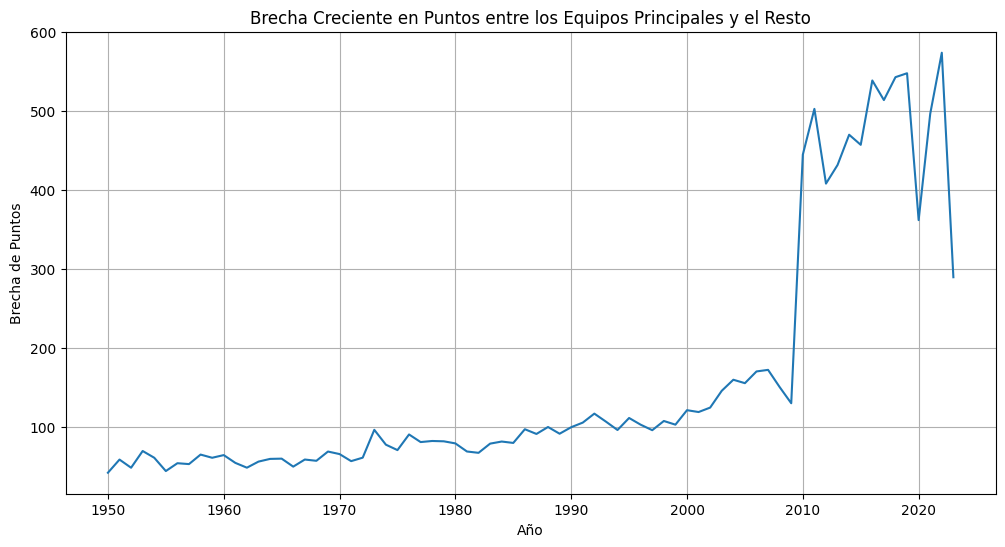

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(brecha_df['year'], brecha_df['brecha'])
plt.xlabel("Año")
plt.ylabel("Brecha de Puntos")
plt.title("Brecha Creciente en Puntos entre los Equipos Principales y el Resto")
plt.grid(True)
plt.show()

In [68]:
df_tablacompleta['grid'] = pd.to_numeric(df_tablacompleta['grid'], errors='coerce')
df_tablacompleta['positionOrder'] = pd.to_numeric(df_tablacompleta['positionOrder'], errors='coerce')

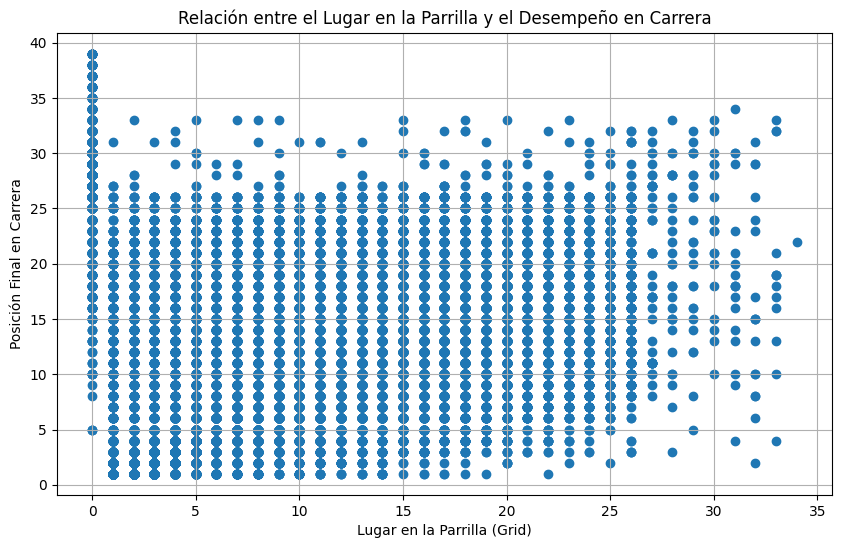

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(df_tablacompleta['grid'], df_tablacompleta['positionOrder'])
plt.xlabel("Lugar en la Parrilla (Grid)")
plt.ylabel("Posición Final en Carrera")
plt.title("Relación entre el Lugar en la Parrilla y el Desempeño en Carrera")
plt.grid(True)
plt.show()

In [70]:
df_tablacompleta['grid_group'] = pd.cut(df_tablacompleta['grid'], bins=[0, 5, 10, 15, 20, float('inf')],
                                       labels=['1-5', '6-10', '11-15', '16-20', '21+'])

In [71]:
# Calcular la matriz de frecuencias
freq_matrix = pd.crosstab(df_tablacompleta['grid_group'], df_tablacompleta['positionOrder'])

# Normalizar para obtener probabilidades
prob_matrix = freq_matrix.div(freq_matrix.sum(axis=1), axis=0)

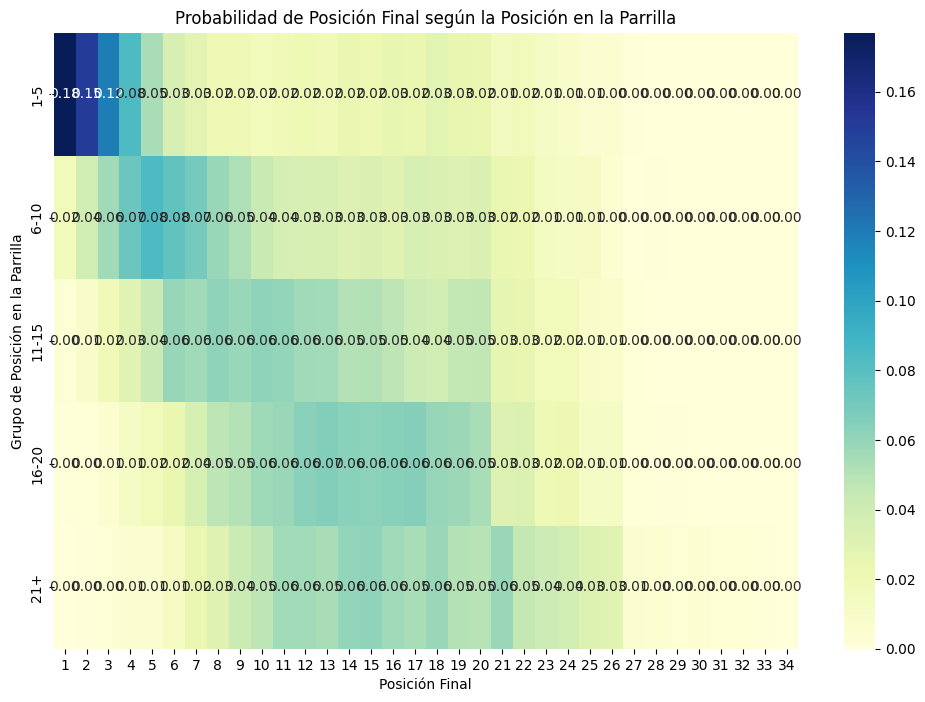

In [72]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(prob_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel("Posición Final")
plt.ylabel("Grupo de Posición en la Parrilla")
plt.title("Probabilidad de Posición Final según la Posición en la Parrilla")
plt.show()

## 5. Preguntas para el Análisis Conjunto y Debate en Clase

Para concluir la actividad, propón a los estudiantes debatir y responder a las siguientes preguntas:

1. **Integración y Calidad de Datos:** ¿Qué inconvenientes pueden surgir al unir tablas que tienen registros incompletos o duplicados? ¿Cómo solucionarlo?
2. **Estrategias de Join:** ¿En qué casos es más adecuado usar un `inner join` y cuándo un `outer join` para evitar perder información relevante?
3. **Insights Negocio:** Basándose en los resultados obtenidos (pilotos con más victorias/puntos, circuitos más usados, etc.), ¿qué estrategias de negocio o insights se podrían extraer para equipos o patrocinadores en la F1?
4. **Análisis Temporal:** ¿Qué relación existe entre los cambios en el número de carreras por año y otros indicadores (como el número de pilotos, eventos destacados, etc.)?

Estas preguntas tienen el objetivo de invitar a un análisis integral de los datos, combinando la técnica de joins con la interpretación y contextualización de los resultados.

## 6. Conclusión

Este ejercicio integrador ha permitido utilizar joins para combinar distintos orígenes de datos y explorar de manera conjunta información esencial de la Fórmula 1. Se ha trabajado en:

- La identificación de claves y la integración de múltiples datasets.
- La generación de indicadores y visualizaciones útiles para responder preguntas de negocio.
- El análisis crítico y debate sobre la calidad de los datos y la metodología de integración.

Utiliza este notebook como una herramienta para profundizar en la recolección y exploración de datos, incentivando a los estudiantes a buscar conexiones entre la teoría de joins y su aplicación en casos reales.